### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [22]:
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('test.csv')


### Defining functions

In [3]:
def clean_data(df):
    columns_to_drop = ['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 
                       'patient_gender', 'patient_state', 'breast_cancer_diagnosis_desc']
    df_cleaned = df.drop(columns=columns_to_drop)
    
    df_cleaned['patient_race'].fillna('Unknown', inplace=True)
    df_cleaned['bmi'].fillna(df_cleaned['bmi'].median(), inplace=True)
    df_cleaned['payer_type'].fillna('Unknown', inplace=True)
    
    columns_to_encode = ['patient_race', 'payer_type', 'Region', 'Division', 
                         'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code']
    df_cleaned = pd.get_dummies(df_cleaned, columns=columns_to_encode)
    df_cleaned.dropna(inplace=True)

    
    return df_cleaned

In [4]:
train_df_cleaned = clean_data(train_df)
test_df_cleaned = clean_data(test_df)

In [23]:
train_df_cleaned

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,metastatic_cancer_diagnosis_code_C7960,metastatic_cancer_diagnosis_code_C7961,metastatic_cancer_diagnosis_code_C7962,metastatic_cancer_diagnosis_code_C7970,metastatic_cancer_diagnosis_code_C7971,metastatic_cancer_diagnosis_code_C7972,metastatic_cancer_diagnosis_code_C7981,metastatic_cancer_diagnosis_code_C7982,metastatic_cancer_diagnosis_code_C7989,metastatic_cancer_diagnosis_code_C799
0,475714,924,84,28.19,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,...,0,0,0,0,0,0,0,0,1,0
1,349367,928,62,28.49,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,...,0,0,0,0,0,0,0,0,0,0
2,138632,760,43,38.09,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,...,0,0,0,0,0,0,0,0,0,0
3,617843,926,45,28.19,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,...,0,0,0,0,0,0,0,0,0,0
4,817482,836,55,28.19,10886.26000,116.886000,43.473469,10.824000,13.976000,9.492000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,436,50,32.11,19413.05882,1196.805882,36.911765,12.876471,13.435294,14.394118,...,0,0,0,0,0,0,0,0,0,0
12902,452909,945,50,28.19,30153.87952,976.289157,42.135802,10.753086,12.714815,11.725926,...,0,0,0,0,0,0,0,0,0,0
12903,357486,926,61,29.24,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,...,0,0,0,0,0,0,0,0,0,0
12904,935417,112,37,31.00,71374.13158,17326.407890,36.476316,12.986842,11.318421,14.971053,...,0,0,0,0,0,0,0,0,0,0


In [24]:
test_df_cleaned

,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_New England,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central,N02,...,race_native,race_other,race_pacific,race_white,rent_burden,rent_median,self_employed,unemployment_rate,veteran,widowed
0,1,0,0,0,0,0,0,0,0,11.157161,...,0.119355,0.770968,0.009677,94.793548,23.895455,825.122449,10.655357,3.406557,8.080645,6.583871
1,0,0,0,0,0,0,1,0,0,13.599985,...,0.187179,1.841026,0.076923,78.217949,34.957895,1343.394737,11.564103,5.002632,9.302564,8.310256
2,0,0,0,0,0,1,0,0,0,20.084231,...,1.193478,18.858696,0.269565,38.708696,34.595652,1778.000000,15.708696,6.197826,3.810870,4.969565
3,0,0,0,0,0,1,0,0,0,20.084231,...,1.193478,18.858696,0.269565,38.708696,34.595652,1778.000000,15.708696,6.197826,3.810870,4.969565
4,0,0,0,0,0,1,0,0,0,21.644261,...,1.120000,22.135385,0.146154,42.824615,37.367742,1651.145161,21.233333,8.683077,3.030769,4.766154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,0,1,0,0,0,0,0,0,0,9.154618,...,0.113043,0.452174,0.013043,95.486957,27.250000,672.062500,12.259091,6.743478,5.908696,7.134783
5788,0,0,0,0,0,0,0,1,0,9.712786,...,0.250000,2.250000,0.400000,75.250000,28.100000,801.750000,8.625000,6.675000,6.875000,5.775000
5789,0,0,0,0,0,1,0,0,0,23.393650,...,0.539623,3.901887,0.728302,64.613208,30.030769,1914.207547,12.731481,4.069811,5.807547,4.105660
5790,0,0,0,0,0,0,0,0,1,9.769358,...,10.462687,1.074627,0.129851,74.488060,26.516393,808.467742,11.425000,4.831818,7.600000,7.110448


### Splitting dataset + scaling

In [7]:
X = train_df_cleaned.drop('DiagPeriodL90D', axis=1)
y = train_df_cleaned['DiagPeriodL90D']

X, test_df_cleaned = X.align((test_df_cleaned), join='outer', axis=1, fill_value=0)
test_df_cleaned = test_df_cleaned[X.columns]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [8]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [9]:
in_x = Input(shape=(X_train.shape[1],))

x = Dense(64, activation='relu')(in_x)
x = Dense(32, activation='relu')(x) 
x = Dense(32, activation='relu')(x)  


out_x = Dense(1, activation='sigmoid')(x)

model1 = Model(inputs=in_x, outputs=out_x)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model1.summary()
model1.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  
              metrics=['accuracy'])

history = model1.fit(X_train_scaled.astype("float"), y_train.astype("float"),
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[early_stopping],
                    verbose=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 189)]             0         
                                                                 
 dense (Dense)               (None, 64)                12160     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 15329 (59.88 KB)
Trainable params: 15329 (59.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
258/258 [====

In [10]:
scores = model1.evaluate(X_test_scaled, y_test)
print(scores)


81/81 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.8066
[0.4897322952747345, 0.8066019415855408]


Defining new model below with dropout and batch normalization to improve performance of model

In [11]:
in_x = Input(shape=(X_train.shape[1],))

x = Dense(64, activation='relu')(in_x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)  

x = Dense(32, activation='relu')(x)  
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Dense(32, activation='relu')(x)  
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

out_x = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs=in_x, outputs=out_x)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model2.summary()
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  
              metrics=['accuracy'])


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 189)]             0         
                                                                 
 dense_4 (Dense)             (None, 64)                12160     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                          

In [12]:
history_new = model2.fit(X_train_scaled.astype("float"), y_train.astype("float"),
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/100
258/258 [==============================] - 2s 3ms/step - loss: 0.6308 - accuracy: 0.6809 - val_loss: 0.5419 - val_accuracy: 0.7728
Epoch 2/100
258/258 [==============================] - 1s 2ms/step - loss: 0.5076 - accuracy: 0.7830 - val_loss: 0.5000 - val_accuracy: 0.8024
Epoch 3/100
258/258 [==============================] - 1s 2ms/step - loss: 0.4863 - accuracy: 0.8012 - val_loss: 0.4991 - val_accuracy: 0.8044
Epoch 4/100
258/258 [==============================] - 1s 3ms/step - loss: 0.4797 - accuracy: 0.8059 - val_loss: 0.4942 - val_accuracy: 0.8053
Epoch 5/100
258/258 [==============================] - 1s 2ms/step - loss: 0.4707 - accuracy: 0.8081 - val_loss: 0.4943 - val_accuracy: 0.8049
Epoch 6/100
258/258 [==============================] - 1s 2ms/step - loss: 0.4644 - accuracy: 0.8128 - val_loss: 0.4975 - val_accuracy: 0.8019
Epoch 7/100
258/258 [==============================] - 1s 2ms/step - loss: 0.4622 - accuracy: 0.8086 - val_loss: 0.4901 - val_accuracy: 0.8073

In [25]:
scores = model2.evaluate(X_test_scaled, y_test)
print(scores)


81/81 [==============================] - 0s 1ms/step - loss: 0.4834 - accuracy: 0.8050
[0.4833794832229614, 0.8050485253334045]


There is not much difference between previous model and new model indicating that there is need to test either different hyperparameters such as batch size, epochs etc.

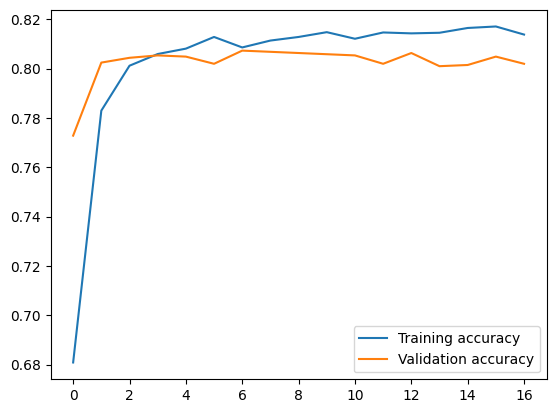

In [14]:
plt.plot(range(len(history_new.history["accuracy"])),history_new.history["accuracy"],label="Training accuracy")
plt.plot(range(len(history_new.history["val_accuracy"])),history_new.history["val_accuracy"],label="Validation accuracy")
plt.legend()

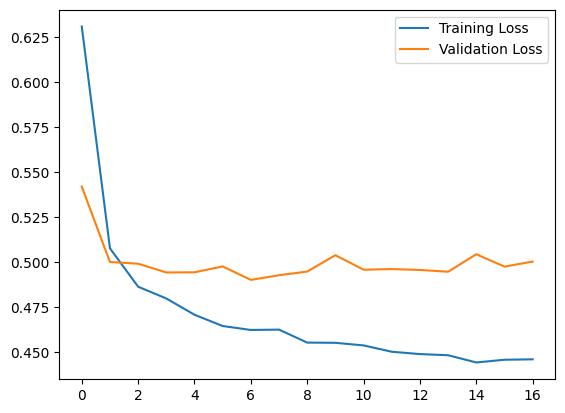

In [15]:
plt.plot(range(len(history_new.history["loss"])),history_new.history["loss"],label="Training Loss")
plt.plot(range(len(history_new.history["val_loss"])),history_new.history["val_loss"],label="Validation Loss")
plt.legend()

In [16]:
model2.predict(X_test_scaled)


81/81 [==============================] - 0s 1ms/step


array([[0.08909521],
       [0.7738744 ],
       [0.11195784],
       ...,
       [0.8332378 ],
       [0.12512839],
       [0.17385134]], dtype=float32)

51/51 [==============================] - 0s 1ms/step


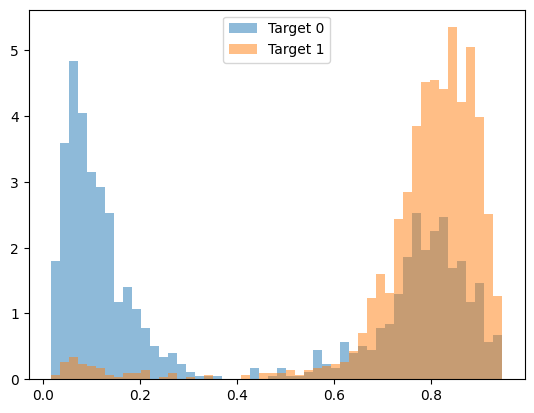

In [17]:
X_Test_0 = X_test_scaled[(y_test==0).to_numpy()]
X_Test_1 = X_test_scaled[(y_test==1).to_numpy()]
hist,bins,_= plt.hist(model2.predict(X_Test_0),density=1,bins=50,alpha=0.5,label="Target 0")
hist,bins,_= plt.hist(model2.predict(X_Test_1),density=1,bins=bins,alpha=0.5,label="Target 1")
plt.legend()

 1/81 [..............................] - ETA: 1s

81/81 [==============================] - 0s 1ms/step


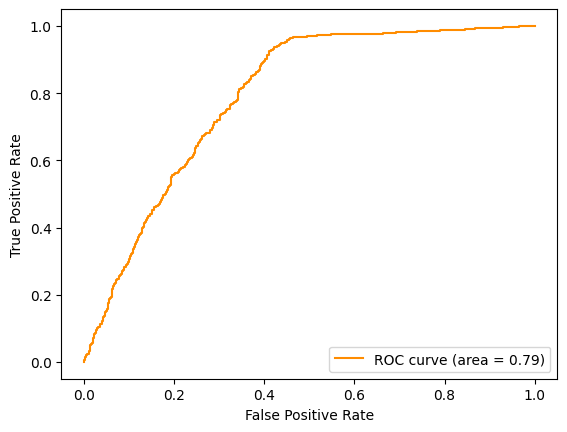

In [18]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, model2.predict(X_test_scaled))
                        
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

The ROC curve for the latest model is shown above and the score is 0.79

### Previous Model

In [19]:
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Aarti Darji\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
import numpy as np
from sklearn.metrics import accuracy_score
import xgboost as xgb

best_xgb_model = xgb.XGBClassifier(
    n_estimators=300,           
    max_depth=3,                
    learning_rate=0.05,         
    subsample=0.9,             
    colsample_bytree=0.9,       
    eval_metric='logloss',      
    random_state=42             
)

best_xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

y_pred = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


[0]	validation_0-logloss:0.64472
[1]	validation_0-logloss:0.63135
[2]	validation_0-logloss:0.61939
[3]	validation_0-logloss:0.60876
[4]	validation_0-logloss:0.60653
[5]	validation_0-logloss:0.59728
[6]	validation_0-logloss:0.58870
[7]	validation_0-logloss:0.58110
[8]	validation_0-logloss:0.57401
[9]	validation_0-logloss:0.56814
[10]	validation_0-logloss:0.56663
[11]	validation_0-logloss:0.56072
[12]	validation_0-logloss:0.55967
[13]	validation_0-logloss:0.55443
[14]	validation_0-logloss:0.54953
[15]	validation_0-logloss:0.54518
[16]	validation_0-logloss:0.54113
[17]	validation_0-logloss:0.53753
[18]	validation_0-logloss:0.53417
[19]	validation_0-logloss:0.53092
[20]	validation_0-logloss:0.52786
[21]	validation_0-logloss:0.52522
[22]	validation_0-logloss:0.52282
[23]	validation_0-logloss:0.52199
[24]	validation_0-logloss:0.51955
[25]	validation_0-logloss:0.51732
[26]	validation_0-logloss:0.51540
[27]	validation_0-logloss:0.51346
[28]	validation_0-logloss:0.51278
[29]	validation_0-loglos

In [21]:
from sklearn.metrics import roc_auc_score

xgb_roc_auc = best_xgb_model.predict_proba(X_test)[:, 1] 

# Compute ROC AUC Score
rf_roc_auc = roc_auc_score(y_test, xgb_roc_auc)
print(f"Random Forest ROC AUC Score: {rf_roc_auc}")


Random Forest ROC AUC Score: 0.8000472738122455


It seems that previous xgboost model performs just a slightly bit better than the deep learning model in terms of ROC AUC score. One reason I believe my deep learning model is not performing any better could be that it might be overfitting and there is need to adjust hyperparameters or split the data such that the performance is better.